YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



--- Strategy Performance ---
Cumulative Return: 92.09%
Annualized Return: 9.80%
Volatility: 11.65%
Sharpe Ratio: 0.84
Max Drawdown: 16.28%


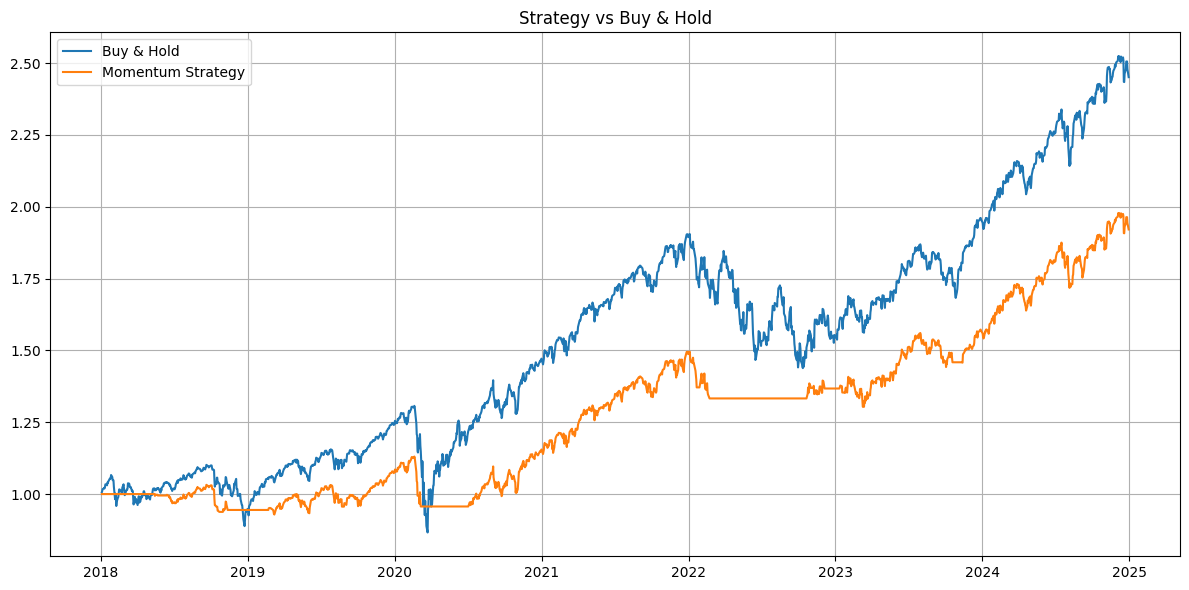

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

ticker = "SPY"
start_date = "2018-01-01"
end_date = "2024-12-31"
lookback = 90

data = yf.download(ticker, start=start_date, end=end_date)
data.rename(columns={"Close":"price"}, inplace=True)
data["momentum"] = data["price"].pct_change(lookback)
data["signal"] = np.where(data["momentum"] > 0, 1, 0)
data["returns"] = data["price"].pct_change()
data["strategy_returns"] = data["returns"] * data["signal"].shift(1)

# Performance metrics
cumulative_return = (1 + data["strategy_returns"]).prod() - 1
annualized_return = (1 + cumulative_return) ** (252 / len(data)) - 1
volatility = data["strategy_returns"].std() * np.sqrt(252)
sharpe_ratio = annualized_return / volatility
max_drawdown = (data["strategy_returns"].cumsum().expanding().max() - data["strategy_returns"].cumsum()).max()

print("\n--- Strategy Performance ---")
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

# Plot
data["cumulative_strategy"] = (1 + data["strategy_returns"]).cumprod()
data["cumulative_price"] = (1 + data["returns"]).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data["cumulative_price"], label="Buy & Hold")
plt.plot(data["cumulative_strategy"], label="Momentum Strategy")
plt.legend()
plt.title("Strategy vs Buy & Hold")
plt.grid(True)
plt.tight_layout()
plt.show()
